In [1]:
# [Data Collection and Preparation] -Importing the libraries

In [2]:
import pandas as pd
import numpy as np 
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

from mlxtend.preprocessing import TransactionEncoder
from sklearn.metrics import accuracy_score,confusion_matrix

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix,accuracy_score
from sklearn.metrics import f1_score,precision_score,recall_score,fbeta_score



In [3]:
#Reading the dataset

In [4]:
dataset=pd.read_csv(r"D:\Documents\dataset\train.csv")

C:\Users\Sharan\AppData\Local\Temp\ipykernel_5604\3481427543.py:1: DtypeWarning: Columns (1,7,8,16,17,18,19,20,35) have mixed types. Specify dtype option on import or set low_memory=False.
  dataset=pd.read_csv(r"D:\Documents\dataset\train.csv")


In [5]:
dataset

,ID,Client_Income,Car_Owned,Bike_Owned,Active_Loan,House_Own,Child_Count,Credit_Amount,Loan_Annuity,Accompany_Client,...,Client_Permanent_Match_Tag,Client_Contact_Work_Tag,Type_Organization,Score_Source_1,Score_Source_2,Score_Source_3,Social_Circle_Default,Phone_Change,Credit_Bureau,Default
0,12142509,6750,0.0,0.0,1.0,0.0,0.0,61190.55,3416.85,Alone,...,Yes,Yes,Self-employed,0.568066,0.478787,NaN,0.0186,63.0,NaN,0
1,12138936,20250,1.0,0.0,1.0,NaN,0.0,15282,1826.55,Alone,...,Yes,Yes,Government,0.563360,0.215068,NaN,NaN,NaN,NaN,0
2,12181264,18000,0.0,0.0,1.0,0.0,1.0,59527.35,2788.2,Alone,...,Yes,Yes,Self-employed,NaN,0.552795,0.329655,0.0742,277.0,0.0,0
3,12188929,15750,0.0,0.0,1.0,1.0,0.0,53870.4,2295.45,Alone,...,Yes,Yes,XNA,NaN,0.135182,0.631355,NaN,1700.0,3.0,0
4,12133385,33750,1.0,0.0,1.0,0.0,2.0,133988.4,3547.35,Alone,...,Yes,Yes,Business Entity Type 3,0.508199,0.301182,0.355639,0.2021,674.0,1.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
121851,12207714,29250,0.0,0.0,NaN,1.0,0.0,107820,3165.3,Relative,...,Yes,No,Business Entity Type 2,NaN,0.173527,0.184116,0.0577,0.0,1.0,1
121852,12173765,15750,0.0,1.0,1.0,0.0,0.0,104256,3388.05,Alone,...,Yes,Yes,Self-employed,NaN,0.371559,0.406617,0.0825,4.0,0.0,0
121853,12103937,8100,0.0,1.0,0.0,1.0,1.0,55107.9,2989.35,Alone,...,No,No,Trade: type 6,0.169049,0.048079,NaN,NaN,0.0,NaN,0
121854,12170623,38250,1.0,1.0,0.0,1.0,0.0,45000,2719.35,Alone,...,Yes,Yes,Business Entity Type 3,0.182737,0.103538,0.077499,0.0979,0.0,2.0,0


In [6]:
# Data Preparation

In [7]:
dataset.isnull().sum()

ID                                0
Client_Income                  3607
Car_Owned                      3581
Bike_Owned                     3624
Active_Loan                    3635
House_Own                      3661
Child_Count                    3638
Credit_Amount                  3632
Loan_Annuity                   4812
Accompany_Client               1746
Client_Income_Type             3701
Client_Education               3645
Client_Marital_Status          3473
Client_Gender                  2413
Loan_Contract_Type             3651
Client_Housing_Type            3687
Population_Region_Relative     4857
Age_Days                       3600
Employed_Days                  3649
Registration_Days              3614
ID_Days                        5968
Own_House_Age                 80095
Mobile_Tag                        0
Homephone_Tag                     0
Workphone_Working                 0
Client_Occupation             41435
Client_Family_Members          2410
Cleint_City_Rating          

In [8]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121856 entries, 0 to 121855
Data columns (total 40 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   ID                          121856 non-null  int64  
 1   Client_Income               118249 non-null  object 
 2   Car_Owned                   118275 non-null  float64
 3   Bike_Owned                  118232 non-null  float64
 4   Active_Loan                 118221 non-null  float64
 5   House_Own                   118195 non-null  float64
 6   Child_Count                 118218 non-null  float64
 7   Credit_Amount               118224 non-null  object 
 8   Loan_Annuity                117044 non-null  object 
 9   Accompany_Client            120110 non-null  object 
 10  Client_Income_Type          118155 non-null  object 
 11  Client_Education            118211 non-null  object 
 12  Client_Marital_Status       118383 non-null  object 
 13  Client_Gender 

In [9]:
# [Exploratory Data Analysis] -Visual Analysis

In [10]:
churn_customers=dataset[dataset['Default'] == 1]
churn_customers.head()

,ID,Client_Income,Car_Owned,Bike_Owned,Active_Loan,House_Own,Child_Count,Credit_Amount,Loan_Annuity,Accompany_Client,...,Client_Permanent_Match_Tag,Client_Contact_Work_Tag,Type_Organization,Score_Source_1,Score_Source_2,Score_Source_3,Social_Circle_Default,Phone_Change,Credit_Bureau,Default
32,12199634,11250,0.0,0.0,1.0,1.0,1.0,18000,900,Alone,...,Yes,Yes,Trade: type 3,NaN,0.287172,0.363945,0.0619,504.0,1.0,1
73,12119933,22500,0.0,0.0,1.0,0.0,0.0,14391,NaN,Alone,...,Yes,Yes,Self-employed,NaN,0.284966,NaN,0.2923,1568.0,NaN,1
75,12205360,15750,0.0,0.0,0.0,0.0,0.0,15750,1158.75,Alone,...,Yes,Yes,Business Entity Type 3,0.342790,0.611850,0.146442,NaN,104.0,4.0,1
94,12192978,13500,1.0,0.0,1.0,1.0,1.0,22500,2362.5,Alone,...,Yes,Yes,Business Entity Type 3,0.492565,0.739379,0.681706,NaN,1716.0,2.0,1
118,12103508,12600,0.0,0.0,0.0,0.0,3.0,29628,1906.2,Alone,...,Yes,Yes,Business Entity Type 3,0.369936,0.312713,0.434733,0.0309,0.0,2.0,1


In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

<function matplotlib.pyplot.show(close=None, block=None)>

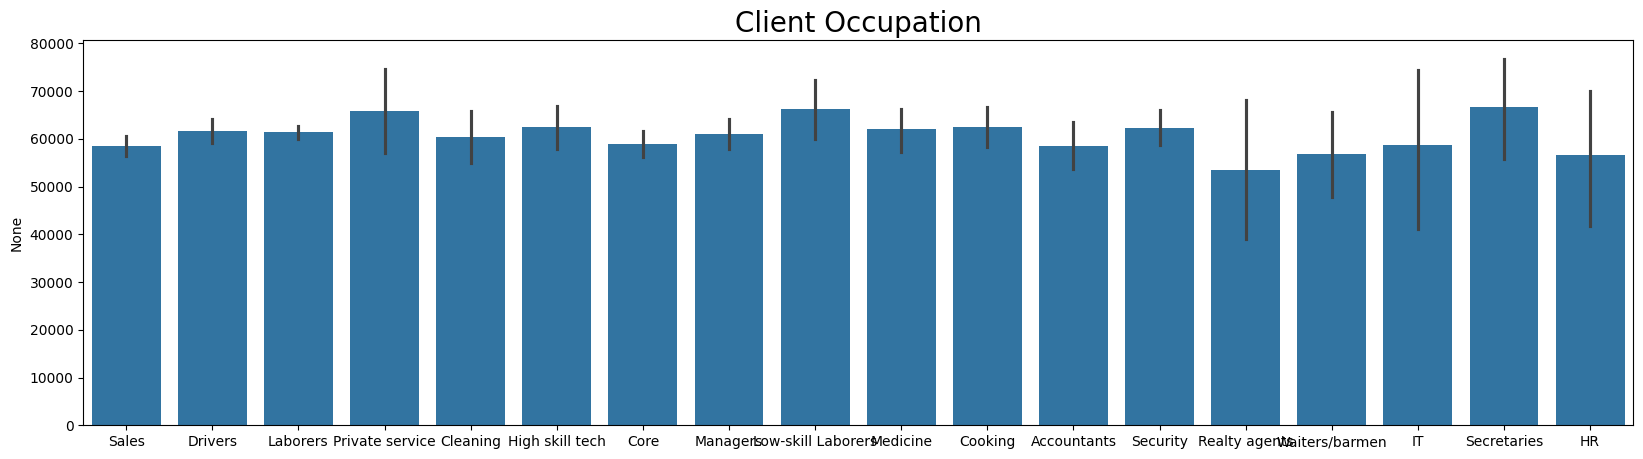

In [12]:
occ_count=churn_customers['Client_Occupation']
plt.figure(figsize=(20,5))
sns.barplot(x=occ_count.values,y=occ_count.index,alpha=1.0)
plt.title('Client Occupation',fontsize=20)
plt.show

(-1.0, 4.0)

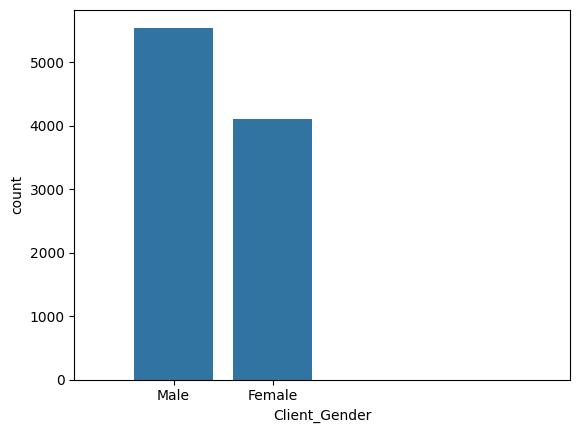

In [13]:
sns.countplot(x = "Client_Gender",data = churn_customers)
plt.xlim(-1,4)

<function matplotlib.pyplot.show(close=None, block=None)>

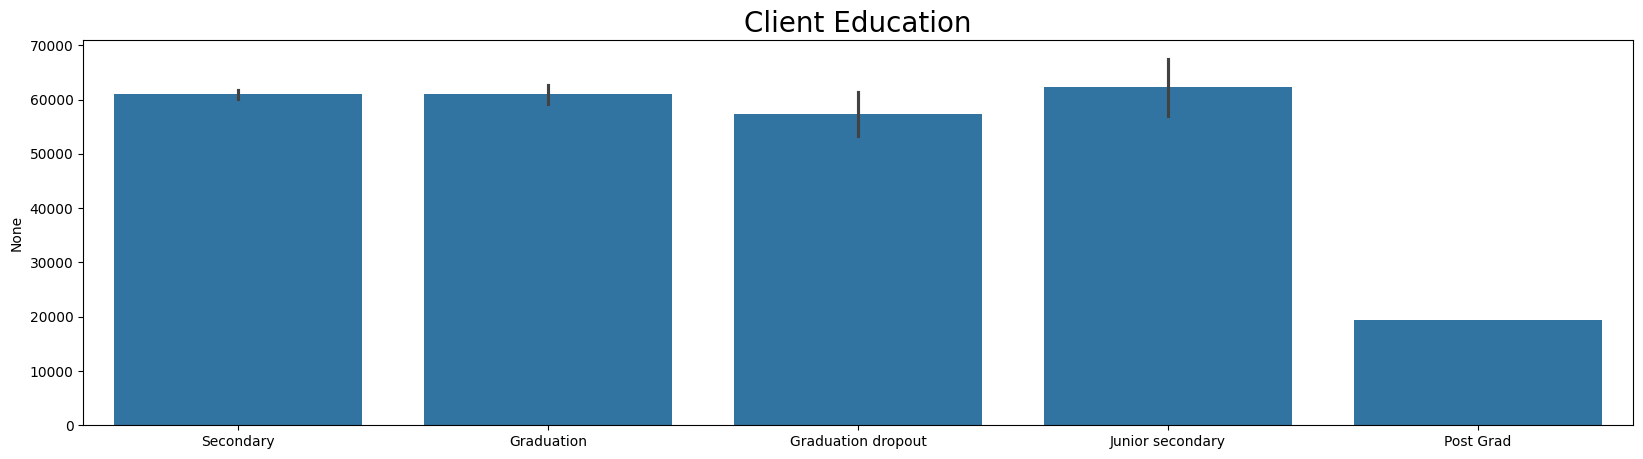

In [14]:

edu_count=churn_customers['Client_Education']
plt.figure(figsize=(20,5))
sns.barplot(x=edu_count.values, y=edu_count.index, alpha=1.0)
plt.title('Client Education', fontsize=20)
plt.show

(-1.0, 4.0)

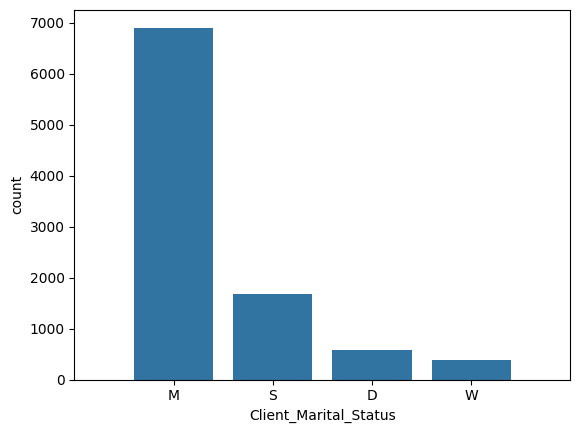

In [15]:
sns.countplot(x = "Client_Marital_Status", data=churn_customers)
plt.xlim(-1,4)

(-1.0, 2.0)

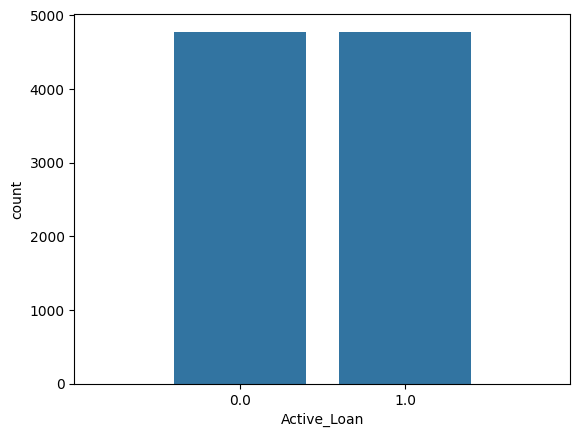

In [16]:
sns.countplot(x = "Active_Loan", data = churn_customers)
plt.xlim(-1,2)

In [17]:
# -Descriptive Statistics

In [18]:
print("Client Income")
churn_customers['Client_Income'].describe()

Client Income


count      9566
unique      322
top       13500
freq       1058
Name: Client_Income, dtype: object

In [19]:
print("Credit Amount")
churn_customers['Credit_Amount'].describe()

Credit Amount


count      9570.0
unique     2251.0
top       45000.0
freq        303.0
Name: Credit_Amount, dtype: float64

In [20]:
print("Loan Annuity")
churn_customers['Loan_Annuity'].describe()

Loan Annuity


count     9439
unique    4207
top        900
freq       155
Name: Loan_Annuity, dtype: object

In [21]:
# [Data Pre-Processing] -Handling missing values

In [22]:
dataset= dataset.drop(['Credit_Bureau','Social_Circle_Default','Age_Days','Employed_Days','Score_Source_1','Score_Source_2','Score_Source_3','Registration_Days','ID_Days','Own_House_Age','Homephone_Tag','Workphone_Working','Application_Process_Day','Application_Process_Hour','Phone_Change'],axis=1)
dataset.head()


,ID,Client_Income,Car_Owned,Bike_Owned,Active_Loan,House_Own,Child_Count,Credit_Amount,Loan_Annuity,Accompany_Client,...,Client_Housing_Type,Population_Region_Relative,Mobile_Tag,Client_Occupation,Client_Family_Members,Cleint_City_Rating,Client_Permanent_Match_Tag,Client_Contact_Work_Tag,Type_Organization,Default
0,12142509,6750,0.0,0.0,1.0,0.0,0.0,61190.55,3416.85,Alone,...,Home,0.028663,1,Sales,2.0,2.0,Yes,Yes,Self-employed,0
1,12138936,20250,1.0,0.0,1.0,NaN,0.0,15282,1826.55,Alone,...,Home,0.008575,1,NaN,2.0,2.0,Yes,Yes,Government,0
2,12181264,18000,0.0,0.0,1.0,0.0,1.0,59527.35,2788.2,Alone,...,Family,0.0228,1,Realty agents,2.0,2.0,Yes,Yes,Self-employed,0
3,12188929,15750,0.0,0.0,1.0,1.0,0.0,53870.4,2295.45,Alone,...,Home,0.010556,1,NaN,2.0,3.0,Yes,Yes,XNA,0
4,12133385,33750,1.0,0.0,1.0,0.0,2.0,133988.4,3547.35,Alone,...,Home,0.020713,1,Laborers,4.0,1.0,Yes,Yes,Business Entity Type 3,0


In [23]:

dataset.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121856 entries, 0 to 121855
Data columns (total 25 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   ID                          121856 non-null  int64  
 1   Client_Income               118249 non-null  object 
 2   Car_Owned                   118275 non-null  float64
 3   Bike_Owned                  118232 non-null  float64
 4   Active_Loan                 118221 non-null  float64
 5   House_Own                   118195 non-null  float64
 6   Child_Count                 118218 non-null  float64
 7   Credit_Amount               118224 non-null  object 
 8   Loan_Annuity                117044 non-null  object 
 9   Accompany_Client            120110 non-null  object 
 10  Client_Income_Type          118155 non-null  object 
 11  Client_Education            118211 non-null  object 
 12  Client_Marital_Status       118383 non-null  object 
 13  Client_Gender 

In [24]:
# -Handling Categorical Values


In [25]:

dataset['Client_Income'] = pd.to_numeric(dataset['Client_Income'],errors='coerce')


In [26]:
dataset['Credit_Amount'] = pd.to_numeric(dataset['Credit_Amount'],errors='coerce')

In [27]:
dataset['Population_Region_Relative'] = pd.to_numeric(dataset['Population_Region_Relative'],errors='coerce')

In [28]:
dataset['Loan_Annuity'] = pd.to_numeric(dataset['Loan_Annuity'],errors='coerce')

In [29]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121856 entries, 0 to 121855
Data columns (total 25 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   ID                          121856 non-null  int64  
 1   Client_Income               118234 non-null  float64
 2   Car_Owned                   118275 non-null  float64
 3   Bike_Owned                  118232 non-null  float64
 4   Active_Loan                 118221 non-null  float64
 5   House_Own                   118195 non-null  float64
 6   Child_Count                 118218 non-null  float64
 7   Credit_Amount               118219 non-null  float64
 8   Loan_Annuity                117030 non-null  float64
 9   Accompany_Client            120110 non-null  object 
 10  Client_Income_Type          118155 non-null  object 
 11  Client_Education            118211 non-null  object 
 12  Client_Marital_Status       118383 non-null  object 
 13  Client_Gender 

In [30]:
from sklearn.preprocessing import LabelEncoder
model_data=dataset

In [31]:
cols = ['Accompany_Client','Client_Income_Type','Client_Education','Client_Marital_Status','Client_Gender','Loan_Contract_Type','Client_Housing_Type','Client_Occupation','Client_Permanent_Match_Tag','Client_Contact_Work_Tag','Type_Organization']

In [32]:
model_data[cols]  = model_data[cols].apply(LabelEncoder().fit_transform)
model_data.head()

,ID,Client_Income,Car_Owned,Bike_Owned,Active_Loan,House_Own,Child_Count,Credit_Amount,Loan_Annuity,Accompany_Client,...,Client_Housing_Type,Population_Region_Relative,Mobile_Tag,Client_Occupation,Client_Family_Members,Cleint_City_Rating,Client_Permanent_Match_Tag,Client_Contact_Work_Tag,Type_Organization,Default
0,12142509,6750.0,0.0,0.0,1.0,0.0,0.0,61190.55,3416.85,1,...,1,0.028663,1,14,2.0,2.0,1,1,42,0
1,12138936,20250.0,1.0,0.0,1.0,NaN,0.0,15282.00,1826.55,1,...,1,0.008575,1,18,2.0,2.0,1,1,11,0
2,12181264,18000.0,0.0,0.0,1.0,0.0,1.0,59527.35,2788.20,1,...,0,0.022800,1,13,2.0,2.0,1,1,42,0
3,12188929,15750.0,0.0,0.0,1.0,1.0,0.0,53870.40,2295.45,1,...,1,0.010556,1,18,2.0,3.0,1,1,57,0
4,12133385,33750.0,1.0,0.0,1.0,0.0,2.0,133988.40,3547.35,1,...,1,0.020713,1,8,4.0,1.0,1,1,5,0


In [33]:
model_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121856 entries, 0 to 121855
Data columns (total 25 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   ID                          121856 non-null  int64  
 1   Client_Income               118234 non-null  float64
 2   Car_Owned                   118275 non-null  float64
 3   Bike_Owned                  118232 non-null  float64
 4   Active_Loan                 118221 non-null  float64
 5   House_Own                   118195 non-null  float64
 6   Child_Count                 118218 non-null  float64
 7   Credit_Amount               118219 non-null  float64
 8   Loan_Annuity                117030 non-null  float64
 9   Accompany_Client            121856 non-null  int32  
 10  Client_Income_Type          121856 non-null  int32  
 11  Client_Education            121856 non-null  int32  
 12  Client_Marital_Status       121856 non-null  int32  
 13  Client_Gender 

In [34]:
# -Handling With Imbalanced Data

In [35]:
model_data['Default'].value_counts()

Default
0    112011
1      9845
Name: count, dtype: int64

In [36]:
# Seperate majority and minority classes

In [37]:
from sklearn.utils import resample 
dataset_majority=dataset[model_data['Default']==0]
dataset_minority=dataset[model_data['Default']==1]

In [38]:
#Unsample minority class


In [39]:
dataset_minority1=resample(dataset_minority,
                           replace=True,# sampling with replacement
                           n_samples=112011, #to match the majority class
                           random_state=42) #reproducible result

In [40]:

#Combine majority class with upsampled minority class


In [41]:
result=pd.concat([dataset_minority1,dataset_majority])
result['Default'].value_counts()

Default
1    112011
0    112011
Name: count, dtype: int64

In [57]:
result

array([[1.2132045e+07, 2.7000000e+04, 0.0000000e+00, ..., 1.0000000e+00,
        5.0000000e+00, 1.0000000e+00],
       [1.2196654e+07, 1.3500000e+04, 0.0000000e+00, ..., 1.0000000e+00,
        4.2000000e+01, 1.0000000e+00],
       [1.2201738e+07, 1.3500000e+04, 1.0000000e+00, ..., 1.0000000e+00,
        3.3000000e+01, 1.0000000e+00],
       ...,
       [1.2103937e+07, 8.1000000e+03, 0.0000000e+00, ..., 0.0000000e+00,
        5.0000000e+01, 0.0000000e+00],
       [1.2170623e+07, 3.8250000e+04, 1.0000000e+00, ..., 1.0000000e+00,
        5.0000000e+00, 0.0000000e+00],
       [1.2105610e+07, 9.0000000e+03, 1.0000000e+00, ..., 1.0000000e+00,
        5.0000000e+00, 0.0000000e+00]])

In [43]:
# -Filling Missing Values and Creating data frame

In [1]:
from mlxtend.preprocessing import TransactionEncoder
column_names=['ID','Client_Income','Car_Owned','Bike_Owned','Active_Loan','House_Own','Child_Count','Credit_Amount','Loan_Annuity','Accompany_Client','Client_Income_Type','Client_Education','Client_Marital_Status','Client_Gender','Loan_Contract_Type','Client_Housing_Type','Population_Region_Relative','Mobile_Tag','Client_Occupation','Client_Family_Members','Cleint_City_Rating','Client_Permanent_Match_Tag','Client_Contact_Work_Tag','Type_Organization','Default']

In [45]:

#Create dataframes

In [67]:
loan_data=pd.DataFrame(result,columns=column_names)
loan_data

,ID,Client_Income,Car_Owned,Bike_Owned,Active_Loan,House_Own,Child_Count,Credit_Amount,Loan_Annuity,Accompany_Client,...,Client_Housing_Type,Population_Region_Relative,Mobile_Tag,Client_Occupation,Client_Family_Members,Cleint_City_Rating,Client_Permanent_Match_Tag,Client_Contact_Work_Tag,Type_Organization,Default
0,12132045.0,27000.0,0.0,1.0,1.0,1.0,0.0,60750.00,7222.50,1.0,...,1.0,0.014520,1.0,10.0,1.0,2.0,1.0,1.0,5.0,1.0
1,12196654.0,13500.0,0.0,1.0,1.0,1.0,0.0,28440.00,1851.30,1.0,...,6.0,0.020713,1.0,14.0,2.0,3.0,0.0,1.0,42.0,1.0
2,12201738.0,13500.0,1.0,0.0,1.0,1.0,0.0,18000.00,900.00,1.0,...,3.0,0.011703,1.0,6.0,2.0,2.0,0.0,1.0,33.0,1.0
3,12131195.0,15750.0,0.0,1.0,1.0,1.0,0.0,59301.00,1746.90,1.0,...,1.0,0.035792,1.0,3.0,1.0,2.0,1.0,1.0,39.0,1.0
4,12214557.0,13500.0,0.0,1.0,1.0,0.0,0.0,30234.15,1840.05,1.0,...,1.0,0.010276,1.0,8.0,2.0,2.0,1.0,1.0,5.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
224017,12136406.0,12150.0,0.0,0.0,1.0,0.0,0.0,78192.00,2383.65,1.0,...,1.0,0.018850,1.0,18.0,1.0,2.0,1.0,1.0,57.0,0.0
224018,12173765.0,15750.0,0.0,1.0,1.0,0.0,0.0,104256.00,3388.05,1.0,...,1.0,0.018209,1.0,14.0,2.0,3.0,1.0,1.0,42.0,0.0
224019,12103937.0,8100.0,0.0,1.0,0.0,1.0,1.0,55107.90,2989.35,1.0,...,1.0,0.008068,1.0,6.0,3.0,3.0,0.0,0.0,50.0,0.0
224020,12170623.0,38250.0,1.0,1.0,0.0,1.0,0.0,45000.00,2719.35,1.0,...,1.0,0.028663,1.0,14.0,2.0,2.0,1.0,1.0,5.0,0.0


In [68]:
from sklearn.impute import KNNImputer

knn = KNNImputer(n_neighbors=5)
result=knn.fit_transform(result)
result

array([[1.2132045e+07, 2.7000000e+04, 0.0000000e+00, ..., 1.0000000e+00,
        5.0000000e+00, 1.0000000e+00],
       [1.2196654e+07, 1.3500000e+04, 0.0000000e+00, ..., 1.0000000e+00,
        4.2000000e+01, 1.0000000e+00],
       [1.2201738e+07, 1.3500000e+04, 1.0000000e+00, ..., 1.0000000e+00,
        3.3000000e+01, 1.0000000e+00],
       ...,
       [1.2103937e+07, 8.1000000e+03, 0.0000000e+00, ..., 0.0000000e+00,
        5.0000000e+01, 0.0000000e+00],
       [1.2170623e+07, 3.8250000e+04, 1.0000000e+00, ..., 1.0000000e+00,
        5.0000000e+00, 0.0000000e+00],
       [1.2105610e+07, 9.0000000e+03, 1.0000000e+00, ..., 1.0000000e+00,
        5.0000000e+00, 0.0000000e+00]])

In [69]:
loan_data

,ID,Client_Income,Car_Owned,Bike_Owned,Active_Loan,House_Own,Child_Count,Credit_Amount,Loan_Annuity,Accompany_Client,...,Client_Housing_Type,Population_Region_Relative,Mobile_Tag,Client_Occupation,Client_Family_Members,Cleint_City_Rating,Client_Permanent_Match_Tag,Client_Contact_Work_Tag,Type_Organization,Default
0,12132045.0,27000.0,0.0,1.0,1.0,1.0,0.0,60750.00,7222.50,1.0,...,1.0,0.014520,1.0,10.0,1.0,2.0,1.0,1.0,5.0,1.0
1,12196654.0,13500.0,0.0,1.0,1.0,1.0,0.0,28440.00,1851.30,1.0,...,6.0,0.020713,1.0,14.0,2.0,3.0,0.0,1.0,42.0,1.0
2,12201738.0,13500.0,1.0,0.0,1.0,1.0,0.0,18000.00,900.00,1.0,...,3.0,0.011703,1.0,6.0,2.0,2.0,0.0,1.0,33.0,1.0
3,12131195.0,15750.0,0.0,1.0,1.0,1.0,0.0,59301.00,1746.90,1.0,...,1.0,0.035792,1.0,3.0,1.0,2.0,1.0,1.0,39.0,1.0
4,12214557.0,13500.0,0.0,1.0,1.0,0.0,0.0,30234.15,1840.05,1.0,...,1.0,0.010276,1.0,8.0,2.0,2.0,1.0,1.0,5.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
224017,12136406.0,12150.0,0.0,0.0,1.0,0.0,0.0,78192.00,2383.65,1.0,...,1.0,0.018850,1.0,18.0,1.0,2.0,1.0,1.0,57.0,0.0
224018,12173765.0,15750.0,0.0,1.0,1.0,0.0,0.0,104256.00,3388.05,1.0,...,1.0,0.018209,1.0,14.0,2.0,3.0,1.0,1.0,42.0,0.0
224019,12103937.0,8100.0,0.0,1.0,0.0,1.0,1.0,55107.90,2989.35,1.0,...,1.0,0.008068,1.0,6.0,3.0,3.0,0.0,0.0,50.0,0.0
224020,12170623.0,38250.0,1.0,1.0,0.0,1.0,0.0,45000.00,2719.35,1.0,...,1.0,0.028663,1.0,14.0,2.0,2.0,1.0,1.0,5.0,0.0


In [70]:
X=loan_data.iloc[:,[0,1,2,3,4,7,8,10,11,12,13,14,18,23]]
X.head(30)

,ID,Client_Income,Car_Owned,Bike_Owned,Active_Loan,Credit_Amount,Loan_Annuity,Client_Income_Type,Client_Education,Client_Marital_Status,Client_Gender,Loan_Contract_Type,Client_Occupation,Type_Organization
0,12132045.0,27000.0,0.0,1.0,1.0,60750.00,7222.50,1.0,0.0,2.0,0.0,0.0,10.0,5.0
1,12196654.0,13500.0,0.0,1.0,1.0,28440.00,1851.30,5.0,4.0,1.0,1.0,0.0,14.0,42.0
2,12201738.0,13500.0,1.0,0.0,1.0,18000.00,900.00,1.0,4.0,1.0,0.0,1.0,6.0,33.0
3,12131195.0,15750.0,0.0,1.0,1.0,59301.00,1746.90,2.0,1.0,2.0,1.0,0.0,3.0,39.0
4,12214557.0,13500.0,0.0,1.0,1.0,30234.15,1840.05,1.0,4.0,1.0,1.0,0.0,8.0,5.0
5,12124782.0,6750.0,0.0,0.0,1.0,18000.00,900.00,4.0,4.0,3.0,1.0,1.0,18.0,57.0
6,12176239.0,9000.0,0.2,0.0,0.0,22950.00,1546.65,5.0,4.0,1.0,0.0,0.0,16.0,40.0
7,12147447.0,11250.0,0.0,0.0,1.0,26865.90,1555.20,1.0,4.0,2.0,1.0,0.0,3.0,47.0
8,12125777.0,8100.0,0.0,0.0,0.0,67500.00,2177.55,4.0,4.0,1.0,1.0,0.0,18.0,57.0
9,12203968.0,31500.0,1.0,0.0,1.0,87681.60,4489.65,5.0,4.0,1.0,0.0,2.0,4.0,4.0


In [71]:
y=loan_data.iloc[:,24]
y.head(30)

0     1.0
1     1.0
2     1.0
3     1.0
4     1.0
5     1.0
6     1.0
7     1.0
8     1.0
9     1.0
10    1.0
11    1.0
12    1.0
13    1.0
14    1.0
15    1.0
16    1.0
17    1.0
18    1.0
19    1.0
20    1.0
21    1.0
22    1.0
23    1.0
24    1.0
25    1.0
26    1.0
27    1.0
28    1.0
29    1.0
Name: Default, dtype: float64

In [72]:
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=0,test_size=.25)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(168016, 14)
(56006, 14)
(168016,)
(56006,)


In [73]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion = 'entropy',random_state = 0)
classifier.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [74]:
prediction = classifier.predict(X_test)

accuracy on training set: 1.000000
accuracy on test set: 0.950487


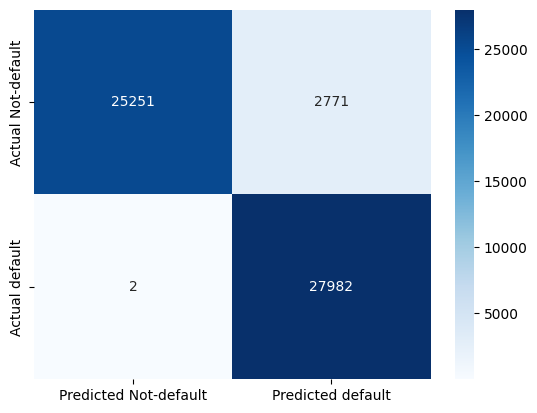

In [75]:
print("accuracy on training set: %f" % classifier.score(X_train, y_train))
print("accuracy on test set: %f" % classifier.score(X_test, y_test))
conf_mat = confusion_matrix(y_test, prediction)
sns.heatmap(conf_mat, annot=True, cmap='Blues', fmt='d',
            xticklabels=['Predicted Not-default', 'Predicted default'],
            yticklabels=['Actual Not-default','Actual default'])
plt.show()


In [76]:
X_train

,ID,Client_Income,Car_Owned,Bike_Owned,Active_Loan,Credit_Amount,Loan_Annuity,Client_Income_Type,Client_Education,Client_Marital_Status,Client_Gender,Loan_Contract_Type,Client_Occupation,Type_Organization
72640,12187920.0,9000.0,0.0,0.0,0.0,22500.0,2683.35,1.0,4.0,1.0,1.0,0.0,3.0,2.0
173078,12181639.0,18000.0,1.0,1.0,1.0,97128.0,5423.40,5.0,4.0,1.0,0.0,0.0,4.0,5.0
85468,12150077.0,22500.0,0.0,1.0,0.0,45000.0,2367.81,5.0,4.0,1.0,0.0,0.0,1.0,33.0
105259,12161050.0,18000.0,0.0,0.0,0.0,149432.4,3064.68,4.0,4.0,1.0,0.0,0.0,18.0,57.0
166213,12146299.0,31500.0,1.0,1.0,1.0,113076.0,3319.20,1.0,4.0,1.0,0.0,0.0,18.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
176963,12219176.0,14400.0,0.0,0.0,1.0,39576.6,2160.00,1.0,4.0,2.0,1.0,0.0,3.0,58.0
117952,12200009.0,11250.0,0.0,0.0,1.0,50940.0,3719.70,5.0,4.0,1.0,0.0,0.0,4.0,42.0
173685,12161167.0,13050.0,0.0,0.0,0.0,22500.0,2205.00,4.0,4.0,1.0,1.0,0.0,18.0,57.0
43567,12144909.0,31500.0,1.0,0.0,0.0,55527.3,2952.81,1.0,4.0,1.0,0.0,0.0,10.0,5.0


In [77]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)

GaussianNB()

In [78]:
predict=classifier.predict(X_test)

Training set : 0.5454182934958576
Testing set : 0.5442988251258793


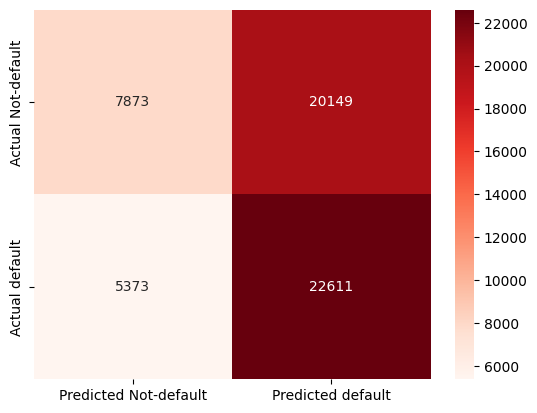

In [79]:
print(f'Training set : {classifier.score(X_train,y_train)}')
print(f'Testing set : {classifier.score(X_test,y_test)}')
conf_mat = confusion_matrix(y_test,predict)
sns.heatmap(conf_mat,annot=True,cmap='Reds',fmt='d',
            xticklabels=['Predicted Not-default', 'Predicted default'],
            yticklabels=['Actual Not-default','Actual default'])
plt.show()

In [80]:
rand_forest = RandomForestClassifier(n_estimators=200,random_state=42)

In [81]:
rand_forest.fit(X_train,y_train)

RandomForestClassifier(n_estimators=200, random_state=42)

Training set :  1.0
Training set :  0.9982501874799129


<Axes: >

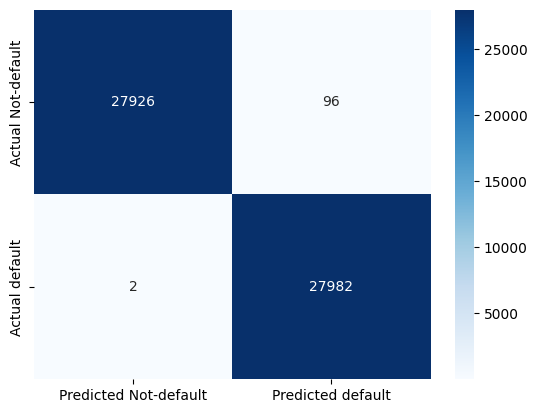

In [82]:
prediction = rand_forest.predict(X_test)
print('Training set : ',rand_forest.score(X_train, y_train))
print('Training set : ',rand_forest.score(X_test, y_test))
conf_mat = confusion_matrix(y_test, prediction)
sns.heatmap(conf_mat,annot=True,cmap='Blues',fmt='d',
            xticklabels=['Predicted Not-default', 'Predicted default'],
            yticklabels=['Actual Not-default','Actual default'])


In [83]:
from sklearn.neighbors import KNeighborsClassifier
KNN = KNeighborsClassifier()
KNN.fit(X_train, y_train)

KNeighborsClassifier()

In [84]:
prediction_knn = KNN.predict(X_test)

Training set :  0.9005749452433102
Testing set :  0.8559440059993572


<Axes: >

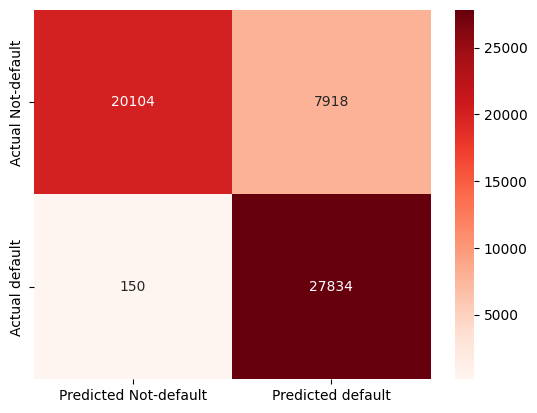

In [85]:
print('Training set : ',KNN.score(X_train, y_train))
print('Testing set : ',KNN.score(X_test, y_test))
conf_mat = confusion_matrix(y_test, prediction_knn)
sns.heatmap(conf_mat, annot=True, cmap='Reds', fmt='d',
            xticklabels=['Predicted Not-default', 'Predicted default'],
            yticklabels=['Actual Not-default', 'Actual default'])

In [ ]:
#!pip install tensorflow

In [86]:
import tensorflow as tf
import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping

In [87]:
model = Sequential()

In [88]:
model.add(Dense(units=10, activation='relu', input_dim=14))

C:\Users\Sharan\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [89]:
model

<Sequential name=sequential, built=True>

In [90]:
model.add(Dense(units=100, activation='relu'))
model.add(Dense(units=100, activation='relu'))
model.add(Dense(units=100, activation='relu'))
model.add(Dense(units=100, activation='relu'))
model.add(Dense(units=100, activation='relu'))

In [91]:
model.add(Dense(units=1, activation='sigmoid'))

In [92]:
model.compile(optimizer='adam', loss='categorical_crossentropy',metrics=['accuracy'])

In [93]:
model.fit(X_train, y_train, batch_size = 100, epochs = 10)

Epoch 1/10


C:\Users\Sharan\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\losses\losses.py:22: SyntaxWarning: In loss categorical_crossentropy, expected y_pred.shape to be (batch_size, num_classes) with num_classes > 1. Received: y_pred.shape=(None, 1). Consider using 'binary_crossentropy' if you only have 2 classes.
  return self.fn(y_true, y_pred, **self._fn_kwargs)


1681/1681 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.5002 - loss: 0.0000e+00
Epoch 2/10
1681/1681 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.5008 - loss: 0.0000e+00
Epoch 3/10
1681/1681 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.5002 - loss: 0.0000e+00
Epoch 4/10
1681/1681 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.4992 - loss: 0.0000e+00
Epoch 5/10
1681/1681 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.4982 - loss: 0.0000e+00
Epoch 6/10
1681/1681 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.4984 - loss: 0.0000e+00
Epoch 7/10
1681/1681 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.4997 - loss: 0.0000e+00
Epoch 8/10
1681/1681 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.5010 - loss: 0.0000e+00
Epoch 9/10
1681/1681 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.4998 - loss: 0.0000e+00
Epoch 10/10
1681/1681 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.4988 - loss: 0.0000e+00


In [107]:
#model = pickle.load(open('
#model.predict([12138936,20250,1,0,1,15282,1826,5,0,1,1,0,18,11])
model.save("model.keras")

In [158]:
X_test.iloc[1:2,:]

,ID,Client_Income,Car_Owned,Bike_Owned,Active_Loan,Credit_Amount,Loan_Annuity,Client_Income_Type,Client_Education,Client_Marital_Status,Client_Gender,Loan_Contract_Type,Client_Occupation,Type_Organization
95740,12114428.0,14625.0,0.0,0.0,1.0,90000.0,3826.35,4.0,4.0,3.0,1.0,0.0,18.0,57.0


In [135]:
type(X_test)

pandas.core.frame.DataFrame

In [130]:
acc_rf = accuracy_score(y_test, predictio
prec_rf = precision_score(y_test, prediction)
rec_rf = recall_score(y_test, prediction)
f1_rf = f1_score(y_test, prediction)
f2_rf = fbeta_score(y_test, prediction, beta=2.0)
results_rf = pd.DataFrame([['Random Forest',
acc_rf,prec_rf,rec_rf,f1_rf,f2_rf]], columns = ['Model','Accuracy', 'Precision', 'Recall', 'F1 Score','F2 Score'])
results_rf = results_rf.sort_values(["Precision","Recall","F2 Score"],ascending = False)
print(results_rf)

           Model  Accuracy  Precision    Recall  F1 Score  F2 Score
0  Random Forest   0.99825   0.996581  0.999929  0.998252  0.999257


In [131]:
acc_naive= accuracy_score(y_test, predict)
prec_naive = precision_score(y_test, predict)
rec_naive = recall_score(y_test, predict)
f1_naive = f1_score(y_test, predict)
f2_naive = fbeta_score(y_test, predict, beta=2.0)
results_naive = pd.DataFrame([['Naive Bayes Classifier',
acc_naive,prec_naive,rec_naive,f1_naive,f2_naive]], columns = ['Model','Accuracy', 'Precision', 'Recall', 'F1 Score','F2 Score'])
results_naive = results_naive.sort_values(["Precision","Recall","F2 Score"],ascending = False)
print(results_naive)

                    Model  Accuracy  Precision    Recall  F1 Score  F2 Score
0  Naive Bayes Classifier  0.544299   0.528789  0.807997  0.639234   0.73082


In [132]:
acc_randf = accuracy_score(y_test, prediction)
prec_randf = precision_score(y_test, prediction)
rec_randf = recall_score(y_test, prediction)
f1_randf = f1_score(y_test, prediction)
f2_randf = fbeta_score(y_test, prediction, beta=2.0)
results_naive = pd.DataFrame([['Naive Bayes Classifier',
acc_randf,prec_randf,rec_randf,f1_randf,f2_randf]], columns = ['Model','Accuracy', 'Precision', 'Recall', 'F1 Score','F2 Score'])
results_randf = results_naive.sort_values(["Precision","Recall","F2 Score"],ascending = False)
print(results_randf)

                    Model  Accuracy  Precision    Recall  F1 Score  F2 Score
0  Naive Bayes Classifier   0.99825   0.996581  0.999929  0.998252  0.999257


In [133]:
acc_knn = accuracy_score(y_test, prediction_knn)
prec_knn = precision_score(y_test, prediction_knn)
rec_knn = recall_score(y_test, prediction_knn)
f1_knn = f1_score(y_test, prediction_knn)
f2_knn = fbeta_score(y_test, prediction_knn, beta=2.0)
results_knn = pd.DataFrame([['K-Nearest Neighbour',
acc_knn,prec_knn,rec_knn,f1_knn,f2_knn]], columns = ['Model','Accuracy', 'Precision', 'Recall', 'F1 Score','F2 Score'])
results_randf = results_knn.sort_values(["Precision","Recall","F2 Score"],ascending = False)
print(results_knn)

                 Model  Accuracy  Precision   Recall  F1 Score  F2 Score
0  K-Nearest Neighbour  0.855944    0.77853  0.99464  0.873415  0.942324


In [164]:
import joblib
joblib.dump(KNN, "knn_model.pkl")

['knn_model.pkl']

In [165]:
import pickle

In [170]:
pickle.dump(KNN, open('C:/Users/Sharan/loan project/py-1/knn_model_pickle.pkl', 'wb'))